In [1]:
# here after collecting the data create the code for implementing the model

In [3]:
import numpy as np
import os
import tensorflow as tf
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
data_dir='temp'
no_of_videos=75
no_of_frames=30

In [5]:
actions=os.listdir(data_dir)
action_map={action:num for num,action in enumerate(actions)}

In [6]:
actions

['afternoon',
 'blank',
 'evening',
 'fine',
 'hello',
 'how are you',
 'morning',
 'name',
 'sorry',
 'thank you',
 'welcome']

In [7]:
x_data=[]
y_data=[]
for action in tqdm.tqdm(actions):
    index=action_map[action]
    for video in range(no_of_videos):
        window=[]
        for frame in range(no_of_frames):
            path=os.path.join(data_dir,action,str(video),f'{frame}.npy')
            res=np.load(path)
            window.append(res)
        x_data.append(window)
        y_data.append(index)
        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [06:38<00:00, 36.18s/it]


In [8]:
len(y_data),11*75

(825, 825)

In [9]:
x=np.array(x_data)

In [10]:
y=keras.utils.to_categorical(np.array(y_data)).astype(int)

In [11]:
y.shape,x.shape

((825, 11), (825, 30, 1662))

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [13]:
x_train.shape,y_train.shape

((742, 30, 1662), (742, 11))

In [15]:
gru_model2_v2=keras.models.Sequential()
gru_model2_v2.add(keras.layers.GRU(64,activation='relu',return_sequences=True,input_shape=(30,1662)))
gru_model2_v2.add(keras.layers.GRU(128,activation='relu',return_sequences=True))
gru_model2_v2.add(keras.layers.GRU(32,activation='relu',return_sequences=False))
gru_model2_v2.add(keras.layers.Dense(64,activation='relu'))
gru_model2_v2.add(keras.layers.Dense(32,activation='relu'))
gru_model2_v2.add(keras.layers.Dense(11,activation='softmax'))
gru_model2_v2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])


history_2_v2=gru_model2_v2.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
24/24 [==============================] - 11s 151ms/step - loss: 2.3979 - categorical_accuracy: 0.0836 - val_loss: 2.3624 - val_categorical_accuracy: 0.1084
Epoch 2/100
24/24 [==============================] - 3s 119ms/step - loss: 2.2505 - categorical_accuracy: 0.1388 - val_loss: 1.9453 - val_categorical_accuracy: 0.3976
Epoch 3/100
24/24 [==============================] - 3s 144ms/step - loss: 1.7608 - categorical_accuracy: 0.2951 - val_loss: 1.3735 - val_categorical_accuracy: 0.4819
Epoch 4/100
24/24 [==============================] - 3s 140ms/step - loss: 1.2875 - categorical_accuracy: 0.5054 - val_loss: 1.0030 - val_categorical_accuracy: 0.6265
Epoch 5/100
24/24 [==============================] - 3s 119ms/step - loss: 0.9425 - categorical_accuracy: 0.6334 - val_loss: 1.6539 - val_categorical_accuracy: 0.3494
Epoch 6/100
24/24 [==============================] - 3s 111ms/step - loss: 0.9583 - categorical_accuracy: 0.6065 - val_loss: 0.6692 - val_categorical_accuracy: 0.73

In [16]:

gru_model2_v2.evaluate(x_test,y_test)

3/3 [==============================] - 0s 36ms/step - loss: 0.0042 - categorical_accuracy: 1.0000


[0.00422377185896039, 1.0]

In [18]:
gru_model2_v2.save("latest_model.h5")

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
gru_model_v2.evaluate(x_test,y_test)

NameError: name 'gru_model_v2' is not defined

In [20]:
from matplotlib import pyplot as plt

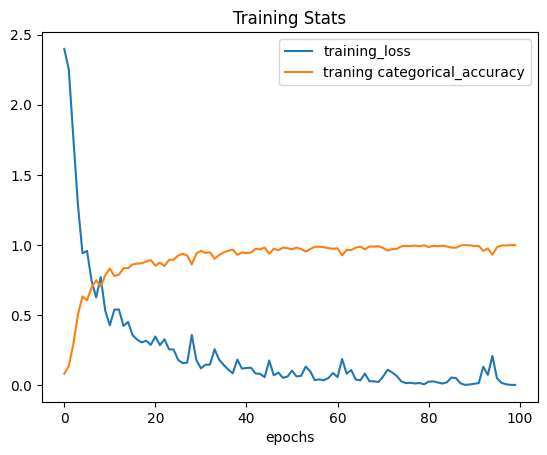

In [21]:
plt.plot(history_2_v2.history['loss'])
plt.plot(history_2_v2.history['categorical_accuracy'])
plt.title('Training Stats')
plt.xlabel('epochs')
plt.legend(['training_loss','traning categorical_accuracy'])
plt.savefig('training_stats.png')

In [19]:
plt.plot(history_2_v2.history['val_loss'])
plt.plot(history_2_v2.history['val_categorical_accuracy'])
plt.title('Training Stats')
plt.xlabel('epochs')
plt.legend(['testing_loss','testing categorical_accuracy'])
plt.savefig('testing_stats.png')

NameError: name 'plt' is not defined

In [18]:
gru_model2_v2.save('gru_isl_model_extra_v2.keras')
gru_model2_v2.save('gru_isl_model_extra_v2.h5')

C:\Users\vivek chouhan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
import pickle

In [23]:
pickle.dump(actions,open('latest_classes.pickle','wb'))

In [50]:
actual=[np.argmax(i) for i in y_test]

In [51]:
len(actual)

45

In [53]:
y_p=gru_model2_v2.predict(x_test)

2/2 [==============================] - 1s 30ms/step


In [54]:
y_p

array([[4.0991516e-11, 1.5915861e-06, 1.7602229e-05, 2.9272464e-04,
        3.4122996e-02, 9.6556503e-01],
       [2.1456553e-10, 9.6570851e-08, 2.1201344e-04, 8.6935339e-03,
        3.4385999e-03, 9.8765570e-01],
       [9.9828440e-01, 1.3990568e-03, 1.9528099e-07, 2.6365076e-04,
        9.8078626e-06, 4.2761432e-05],
       [1.5491990e-10, 1.1384355e-07, 9.9908757e-01, 6.9884126e-10,
        8.6657028e-04, 4.5797864e-05],
       [8.0207320e-15, 1.3361032e-11, 2.1496926e-06, 3.4936625e-07,
        2.9814078e-03, 9.9701607e-01],
       [3.3969862e-09, 1.8448958e-05, 1.1921901e-03, 2.7535358e-05,
        8.7938541e-01, 1.1937642e-01],
       [2.3373993e-15, 7.6752504e-13, 1.5847012e-07, 5.9118061e-06,
        2.2797358e-05, 9.9997115e-01],
       [1.0250419e-08, 4.1355665e-06, 9.7584730e-01, 1.6533741e-08,
        2.3974326e-02, 1.7417989e-04],
       [6.2335333e-05, 9.9906415e-01, 3.0153806e-05, 4.6705865e-04,
        2.9726129e-04, 7.8963087e-05],
       [3.9946135e-10, 1.2318050e-07,

In [56]:
predicted=[np.argmax(i) for i in y_p]

In [57]:
from seaborn import heatmap

In [59]:
cm=tf.math.confusion_matrix(actual,predicted)

In [60]:
from sklearn.metrics import classification_report

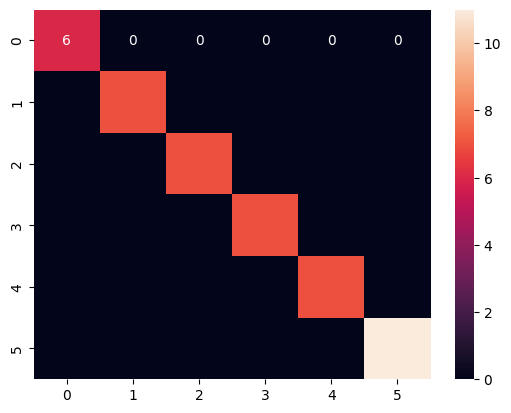

In [64]:
cm_plot=heatmap(cm,annot=True)

In [67]:
cm_plot.get_figure().savefig('v2_cm.png')

In [68]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

